In [2]:
import pandas as pd
import numpy as np

import os,sys
import glob
from PIL import Image

from matplotlib.pyplot import imshow
from skimage import transform

In [4]:
train_df = pd.read_json("data/original/train.json")

In [5]:
train_df[train_df['listing_id'] == 6812234]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
115189,1.0,1,0,2016-04-02 01:20:46,"Building features a DOORMAN, ELEVATOR, LAUNDRY...",East 77th Street,"[Doorman, No Fee, Dogs Allowed, Cats Allowed]",low,40.7698,6812234,-73.9512,9fb89dd6389267ed37abbd8d78efcd6f,[https://photos.renthop.com/2/6812234_03ffaf02...,3495,500 East 77th Street


In [8]:
image_temp = Image.open("data/original/images_sample/images_sample/6811957/6811957_33d08c8dc440c89bccc8d9889c5485a6.jpg")

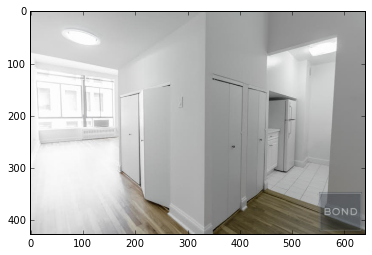

In [9]:
%matplotlib inline
imshow(np.asarray(image_temp))

In [10]:
image_matrix = np.asarray(image_temp)

In [11]:
image_matrix.shape

(426, 640, 3)

In [16]:
pic_folder_list = [name for name in os.listdir("data/original/images_sample/images_sample") if os.path.isdir(os.path.join('data/original/images_sample/images_sample', name))]

In [18]:
pic_dict = dict()
for pic_folder in pic_folder_list:
    pic_dict[pic_folder] = dict()
    
    relative_path = os.path.join('data/original/images_sample/images_sample', pic_folder)
    pic_name_list = glob.glob(relative_path + '/*.jpg')
    
    for pic in pic_name_list:
        pic_dict[pic_folder][pic] = Image.open(pic)

In [19]:
size_list = []
image_list = []
for folder_name, folder_dic in pic_dict.items():
    for image_name, image in pic_dict[folder_name].items():
        size_list.append(list(image.size))
        image_list.append(image)

In [20]:
np.where(np.array(size_list)[:, 0] < 200)

(array([248, 413], dtype=int64),)

In [23]:
image_list[248].size

(177, 267)

In [28]:
image_matrix = np.array(image_list[248])
image_matrix.shape

(267, 177, 3)

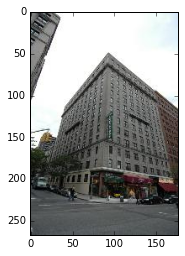

In [30]:
imshow(image_matrix)

In [31]:
size_list

[[480, 640],
 [640, 479],
 [640, 487],
 [600, 400],
 [600, 400],
 [600, 400],
 [600, 400],
 [600, 400],
 [600, 400],
 [600, 400],
 [475, 640],
 [640, 422],
 [640, 412],
 [640, 388],
 [640, 426],
 [640, 480],
 [480, 640],
 [640, 480],
 [640, 432],
 [640, 400],
 [640, 434],
 [478, 640],
 [640, 441],
 [640, 426],
 [426, 640],
 [426, 640],
 [640, 426],
 [640, 426],
 [640, 426],
 [640, 426],
 [640, 423],
 [640, 423],
 [640, 423],
 [640, 423],
 [512, 608],
 [640, 423],
 [640, 423],
 [640, 423],
 [640, 423],
 [474, 640],
 [480, 640],
 [640, 570],
 [640, 570],
 [495, 640],
 [483, 640],
 [479, 640],
 [495, 640],
 [630, 640],
 [307, 640],
 [483, 640],
 [480, 640],
 [536, 640],
 [640, 480],
 [640, 480],
 [480, 640],
 [480, 640],
 [640, 480],
 [640, 480],
 [640, 480],
 [640, 480],
 [640, 480],
 [640, 426],
 [640, 426],
 [640, 480],
 [640, 480],
 [480, 640],
 [480, 640],
 [480, 640],
 [640, 426],
 [640, 426],
 [640, 426],
 [640, 426],
 [480, 640],
 [640, 480],
 [640, 480],
 [640, 360],
 [640, 480],

In [29]:
type(image_matrix)

numpy.ndarray

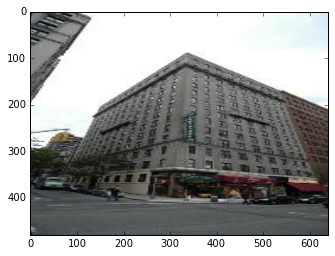

In [33]:
temp_2 = transform.resize(image_matrix, [480, 640])
imshow(temp_2)

In [58]:
train_id = []
train_data = []
train_label = []

for folder_name, folder_pics in pic_dict.items():
    listing_id_temp = int(folder_name)
    # print(listing_id_temp)
    try:
        label_temp = train_df.query('listing_id == {}'.format(listing_id_temp))['interest_level'].values[0]
    except IndexError:
        continue
    for pic in folder_pics.values():
        train_id.append(listing_id_temp)
        train_data.append(transform.resize(np.array(pic), [480, 640]))
        train_label.append(label_temp)

In [72]:
train_data = np.array(train_data)
train_label = np.array(train_label)
train_id = np.array(train_id)

In [77]:
np.save("train_data", train_data)
np.save("train_label", train_label)
np.save("train_id", train_id)